<a href="https://colab.research.google.com/github/chirudukuru/cvd-Covid19/blob/main/CVD_covid_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cardiovascularcovid.csv to cardiovascularcovid (1).csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['cardiovascularcovid.csv']))

In [ ]:
df.head()

,Case,Age,Smoking,COVID-19,Temperature,Cough,Headache,Sore throat,Oxigen saturation (%),Heartrateminute,Respiratory ratw (breaths minute),Critical status,ICU,Oxigen (%),Frac oxygen (%),Systolic b.p (mmHg),Diastolic b.p (mmHg),Bilateral pulmonary,Length of ICU stay (days),Outcome
0,Patient 1,59,1,1,36.2,1,1,1,95,80,16,1,0,95,21,120,70,0,0,1
1,Patient 2,52,1,1,37.8,0,0,0,99,115,18,3,1,99,24,70,40,1,4,1
2,Patient 3,58,1,0,37.5,1,0,0,94,82,16,1,0,94,21,110,70,1,0,1
3,Patient 4,55,1,1,39.5,1,0,0,96,89,18,2,1,96,21,110,80,1,1,1
4,Patient 5,40,1,1,38.0,1,1,0,98,90,15,2,0,98,21,115,70,0,0,1


In [ ]:
import matplotlib.pyplot as plt
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [ ]:
df.shape

(51, 20)

In [ ]:
df.describe()

,Age,Smoking,COVID-19,Temperature,Cough,Headache,Sore throat,Oxigen saturation (%),Heartrateminute,Respiratory ratw (breaths minute),Critical status,ICU,Oxigen (%),Frac oxygen (%),Systolic b.p (mmHg),Diastolic b.p (mmHg),Bilateral pulmonary,Length of ICU stay (days),Outcome
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,53.294118,0.666667,0.725490,37.700000,0.803922,0.313725,0.215686,95.098039,89.882353,18.333333,2.019608,0.470588,94.627451,23.647059,130.862745,77.196078,0.509804,2.019608,1.411765
std,9.521122,0.476095,0.450708,0.983056,0.400979,0.468623,0.415390,3.971171,16.376382,5.286461,0.882954,0.504101,4.204573,7.317988,23.031300,12.457961,0.504878,2.686933,0.753033
min,31.000000,0.000000,0.000000,35.500000,0.000000,0.000000,0.000000,79.000000,65.000000,5.000000,1.000000,0.000000,79.000000,21.000000,70.000000,40.000000,0.000000,0.000000,1.000000
25%,49.000000,0.000000,0.000000,37.000000,1.000000,0.000000,0.000000,94.000000,75.500000,16.000000,1.000000,0.000000,93.000000,21.000000,118.500000,70.000000,0.000000,0.000000,1.000000
50%,55.000000,1.000000,1.000000,37.700000,1.000000,0.000000,0.000000,96.000000,90.000000,18.000000,2.000000,0.000000,95.000000,21.000000,130.000000,76.000000,1.000000,0.000000,1.000000
75%,59.000000,1.000000,1.000000,38.350000,1.000000,1.000000,0.000000,97.500000,100.000000,22.000000,3.000000,1.000000,97.000000,21.000000,141.000000,83.500000,1.000000,4.000000,1.500000
max,75.000000,1.000000,1.000000,39.500000,1.000000,1.000000,1.000000,100.000000,124.000000,43.000000,3.000000,1.000000,100.000000,60.000000,196.000000,112.000000,1.000000,9.000000,3.000000


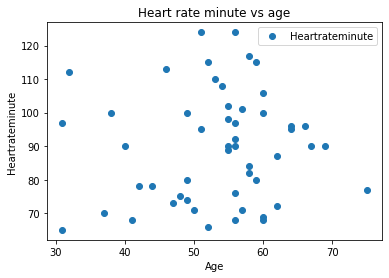

In [ ]:
df.plot(x='Age', y='Heartrateminute', style='o')  
plt.title('Heart rate minute vs age')  
plt.xlabel('Age')  
plt.ylabel('Heartrateminute')  
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


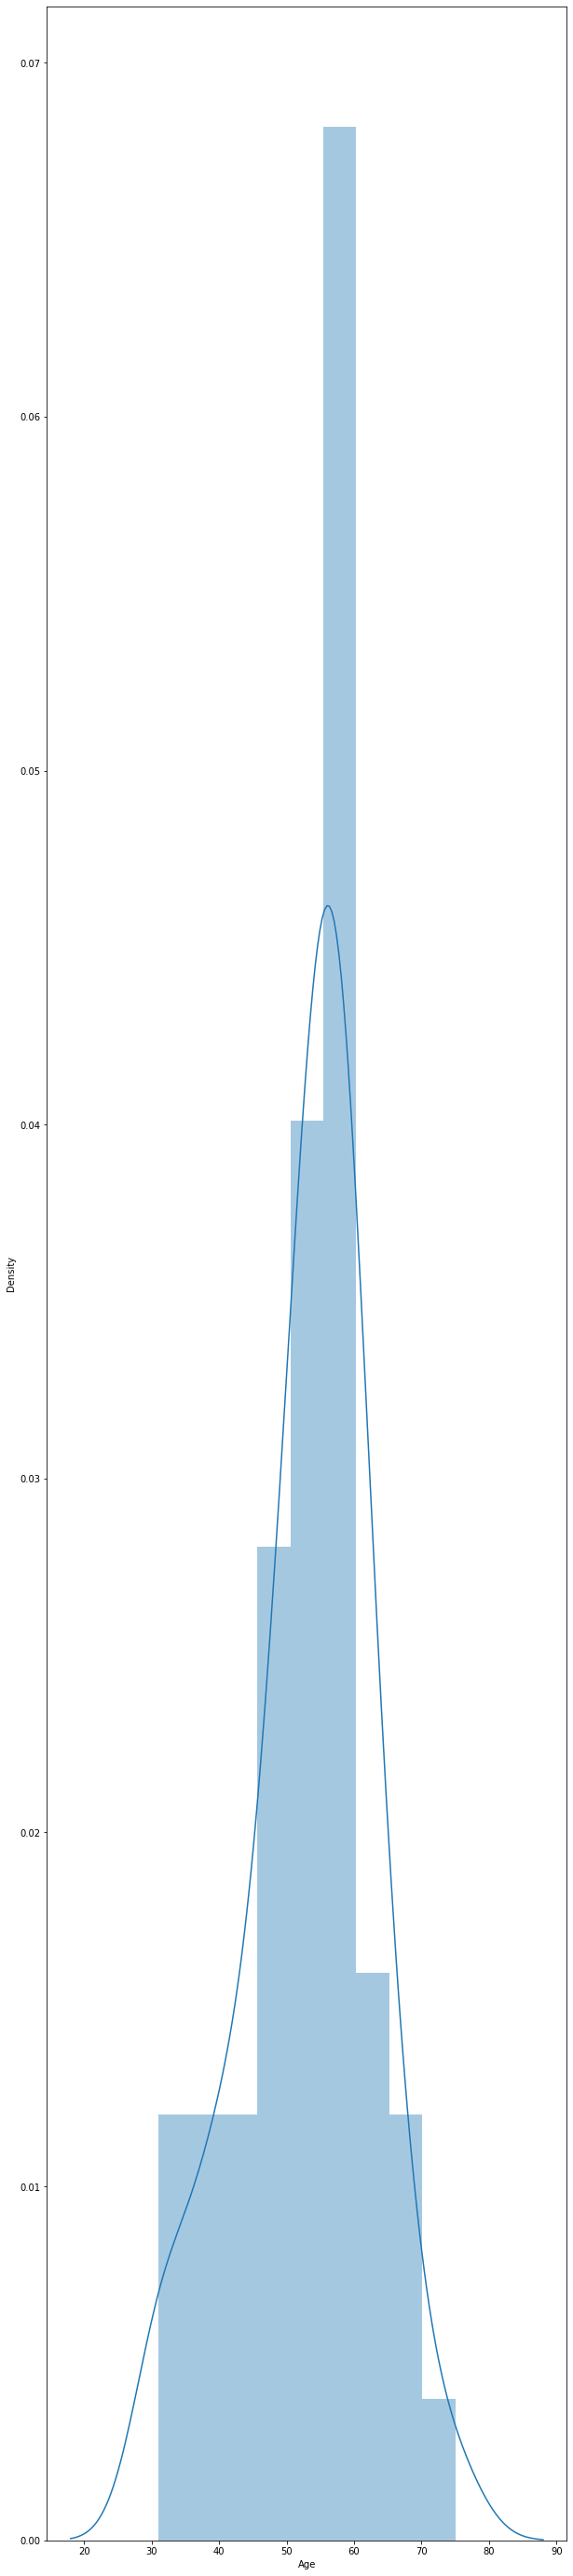

In [ ]:
plt.figure(figsize=(10,50))
plt.tight_layout()
seabornInstance.distplot(df['Age'])

In [ ]:
X = df['Age'].values.reshape(3,17)
y = df['Heartrateminute'].values.reshape(3,17)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
regressor = LinearRegression()  


In [ ]:
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(regressor.intercept_)

[ 90.50647333 108.76178146  88.56654583  89.32832729  85.73174521
  90.80683584  85.22320041 119.40341792 110.10512688  93.61160021
  77.16312791  81.879855   116.61160021  83.14810979  90.28327292
  98.20818229  77.53650958]


In [ ]:
print(regressor.coef_)

[[-0.22371828  0.11600207 -0.02485759  0.          0.29000518  0.10771621
  -0.04971517  0.01657172  0.04971517 -0.08285862  0.0662869   0.04971517
   0.08285862  0.03314345 -0.25686173 -0.08285862 -0.07457276]
 [ 0.13283273 -0.06887623  0.01475919  0.         -0.17219057 -0.0639565
   0.02951838 -0.00983946 -0.02951838  0.04919731 -0.03935785 -0.02951838
  -0.04919731 -0.01967892  0.15251165  0.04919731  0.04427758]
 [-0.13982393  0.07250129 -0.01553599  0.          0.18125324  0.06732263
  -0.03107198  0.01035733  0.03107198 -0.05178664  0.04142931  0.03107198
   0.05178664  0.02071466 -0.16053858 -0.05178664 -0.04660798]
 [-0.0069912   0.00362506 -0.0007768   0.          0.00906266  0.00336613
  -0.0015536   0.00051787  0.0015536  -0.00258933  0.00207147  0.0015536
   0.00258933  0.00103573 -0.00802693 -0.00258933 -0.0023304 ]
 [ 0.09088555 -0.04712584  0.01009839  0.         -0.1178146  -0.04375971
   0.02019679 -0.00673226 -0.02019679  0.03366132 -0.02692905 -0.02019679
  -0.03366

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,92,96.803729
1,80,105.022786
2,97,92.502330
3,78,89.525117
4,84,83.173485
5,73,85.296737
6,68,89.552563
7,76,116.648369
8,106,105.972553
9,75,95.776282


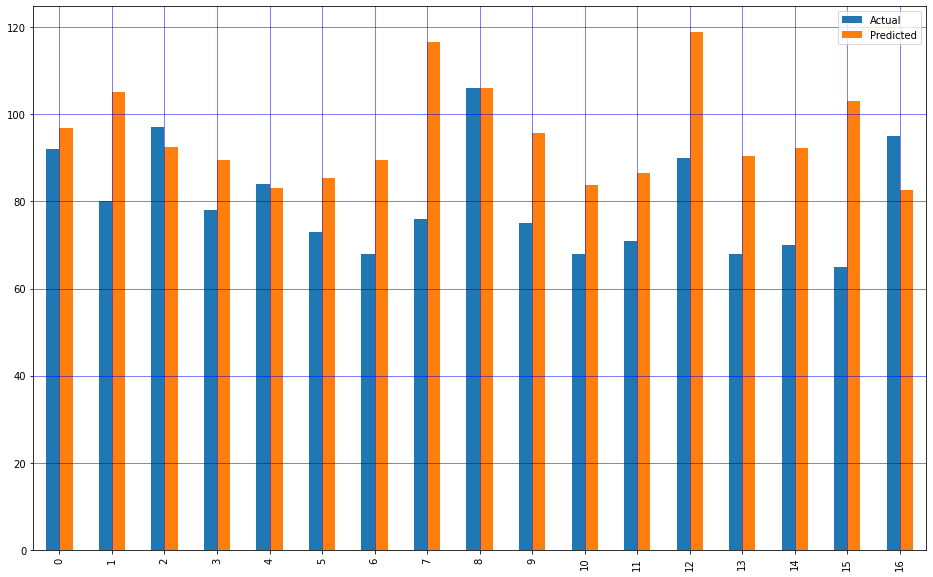

In [ ]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='Blue')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='Green')
plt.show()

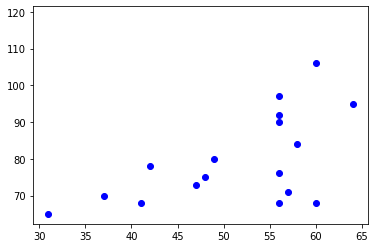

In [ ]:
plt.scatter(X_test, y_test,  color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 17.4920949218631
Mean Squared Error: 437.0509937877645
Root Mean Squared Error: 20.905764606628587
